In [5]:
import pandas as pd
import numpy as np
file_path = '~/data/data/bike-sharing-demand/train.csv'
df = pd.read_csv(file_path)

# 데이터 확인
#print(data.head())
#print(data.info())

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second


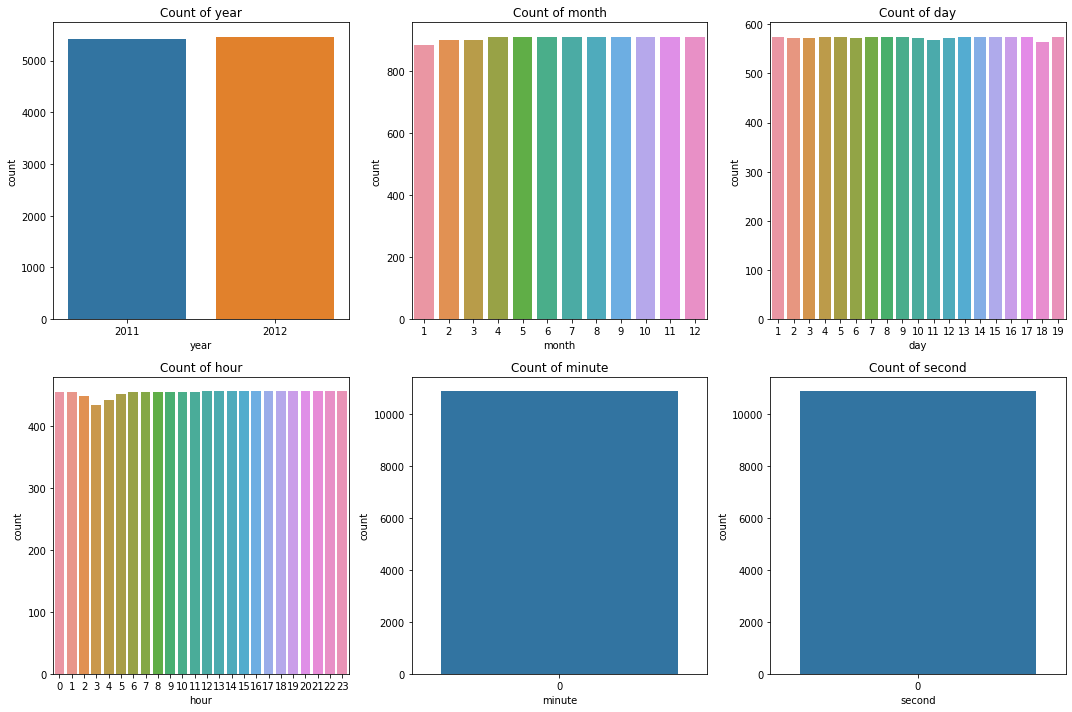

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))

# Using countplot to visualize data count for each component
components = ['year', 'month', 'day', 'hour', 'minute', 'second']
for i, component in enumerate(components):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=component, data=df)
    plt.title(f'Count of {component}')
    plt.tight_layout()

plt.show()


In [10]:
features = ['year', 'month', 'day', 'hour', 'minute', 'second', 'temp', 'atemp', 'humidity', 'windspeed']
X = df[features]
y = df['count']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Step 6: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
print(mse,rmse)

19945.33444707294 141.22795207420145


In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test['temp'], y_pred, alpha=0.5, color='blue')
plt.title('Predicted Count vs Temperature')
plt.xlabel('Temperature (temp)')
plt.ylabel('Predicted Count')
plt.grid(True)

# Plotting predicted counts against humidity
plt.subplot(1, 2, 2)
plt.scatter(X_test['humidity'], y_pred, alpha=0.5, color='green')
plt.title('Predicted Count vs Humidity')
plt.xlabel('Humidity')
plt.ylabel('Predicted Count')
plt.grid(True)

plt.tight_layout()
plt.show()